## Univelcity Virtual Intership -- Week 2

#### Instruction.

This file contains transactions made by certain users over a period of time.

Carry out an exploratory analysis to glean out insights and trends in the dataset.

Find a means to relate it with external data to help understand user behaviour. 

Try to notice trends in what triggers transactions at certain times of the year, 

what could be the possible cause of increased failed transactions… etc.

Make a mini presentation with the use of the jupyter slides extension and hide the input cells of the selected pages of the slide.

In [1]:
# importing dependencies

import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
sns.set_theme(context='paper', 
              style='white',
             font_scale=1.2)

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# importing and viewing transaction data

data = pd.read_csv('txn_data.csv', index_col='Unnamed: 0')

In [3]:
data

,acct_no,txnYear,txnMonth,txnDay,status,no of txns
0,1001192k,2019,10,29,successful,1
1,1001192k,2019,11,12,failed,2
2,1001192k,2019,11,18,failed,1
3,1001192k,2019,11,27,successful,1
4,1001192k,2019,12,8,failed,1
...,...,...,...,...,...,...
513242,9999437n,2020,10,15,successful,2
513243,9999437n,2020,10,16,successful,1
513244,9999437n,2020,10,21,successful,2
513245,9999437n,2020,10,23,successful,2


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
txnYear,513247.0,2019.704659,0.456196,2019.0,2019.0,2020.0,2020.0,2020.0
txnMonth,513247.0,7.686192,2.807047,1.0,6.0,8.0,10.0,12.0
txnDay,513247.0,15.299743,8.842967,1.0,7.0,15.0,23.0,31.0
no of txns,513247.0,2.410981,9.461224,1.0,1.0,1.0,2.0,1249.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513247 entries, 0 to 513246
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   acct_no     513247 non-null  object
 1   txnYear     513247 non-null  int64 
 2   txnMonth    513247 non-null  int64 
 3   txnDay      513247 non-null  int64 
 4   status      513247 non-null  object
 5   no of txns  513247 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 27.4+ MB


In [6]:
# making a timeseries from the data

data['txnYear'], data['txnMonth'], data['txnDay'] = data['txnYear'].astype(str),data['txnMonth'].astype(str),data['txnDay'].astype(str)
data['date'] = data['txnYear']+ data['txnMonth']+data['txnDay']
data['date'] = data['date'].apply(lambda x:dt.datetime.strptime(x,'%Y%m%d'))

In [7]:
# set index as timeseries

data = data.set_index(data['date'].values)
data = data.drop('date', axis=1)
data = data.rename(columns={'no of txns':'txn_volume'})
data = data.sort_index(axis=0)

In [8]:
# transform the status column, either successful or failed

data['status']= np.where((data['status']=='successful'),'successful','failed')

In [9]:
# basic info about the transaction data

print(f'There are {data["acct_no"].nunique()} unique users over the period.')
print(f'Transaction period is from ({data.index[0].strftime("%Y %B %d")}) to ({data.index[-1].strftime("%Y %B %d")}).')

There are 8040 unique users over the period.
Transaction period is from (2019 May 21) to (2020 December 09).


##### Transformed the data by adding few steps

1. Made a timeseries column from the year, month and day columns.

2. Set the timeseries column to the index.

3. Sort the new index in ascending order.

4. Transformed the status column to either successful or failed

In [10]:
data

,acct_no,txnYear,txnMonth,txnDay,status,txn_volume
2019-05-21,1718601l,2019,5,21,successful,3
2019-05-21,6013170r,2019,5,21,successful,1
2019-05-21,3800682k,2019,5,21,successful,1
2019-05-21,7988606p,2019,5,21,successful,2
2019-05-21,6485922j,2019,5,21,successful,4
...,...,...,...,...,...,...
2020-12-09,9985393s,2020,1,29,successful,2
2020-12-09,6038095m,2020,1,29,successful,3
2020-12-09,6033179m,2020,1,29,successful,1
2020-12-09,6030222l,2020,1,29,successful,1


In [11]:
data.describe(include='O').T

,count,unique,top,freq
acct_no,513247,8040,4203382q,1261
txnYear,513247,2,2020,361664
txnMonth,513247,12,10,105134
txnDay,513247,31,3,20078
status,513247,2,successful,473051


In [12]:
# trend in transaction volume over the period
def plot_day():
    data.txn_volume.resample('D').sum().plot(figsize=(15,6), color='brown')
    plt.title('Trasanction Volume per Day',  fontsize=14)
    plt.ylabel('Volume', fontsize=12)
    plt.show()

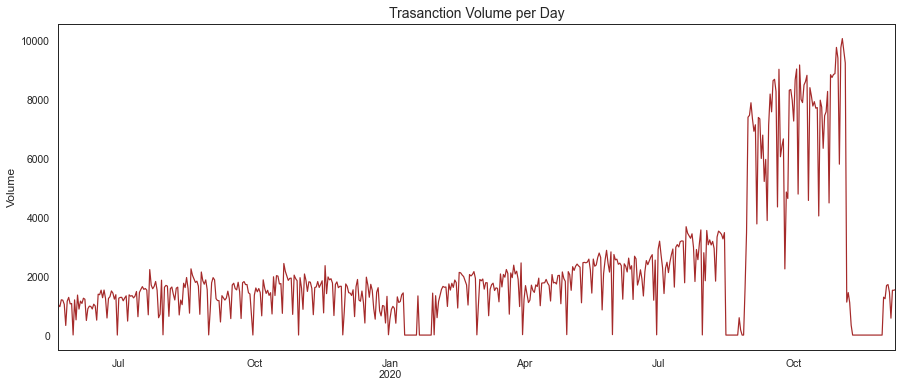

In [13]:
# plot showing the seasional behaviour of users over the period
plot_day()

In [14]:
def plot_volume(): 
    fig, ax = plt.subplots(figsize=[16,7], )
    ax.plot(data.txn_volume.resample('M').sum().index,data.txn_volume.resample('M').count(), marker='o', color='brown', label='no. of txns')
    ax.set_xlabel('Months', fontsize=12)
    ax.grid()
    ax.set_ylabel( 'No of Transactions', fontsize=12)


    ax2=ax.twinx()
    ax2.bar(data.txn_volume.resample('M').sum().index,data.txn_volume.resample('M').sum(), width=20, label='Transaction volume')
    ax2.set_ylabel('Total Transaction Volume', fontsize=12)

    ax.legend()
    # ax2.legend()

    plt.title('Transaction Volume', fontsize=14)
    plt.show()


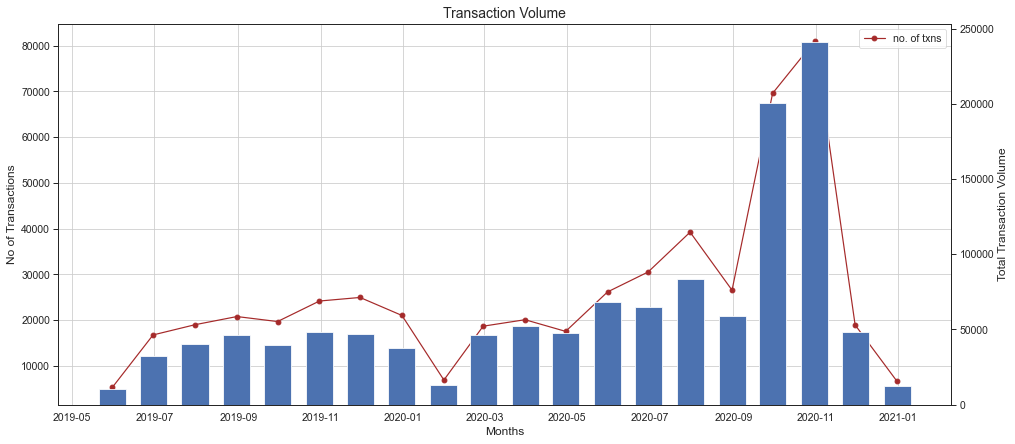

In [15]:
plot_volume()

#### User Behavior Irregularity  

There seem to be very high volume during October & November 2020,

The was the period #Endsar #EndPoliceBrutality protest was ongoing in Nigeria

In [16]:
def plot_bar_top_user():
    data[data['status']=='successful'].groupby('acct_no').mean().sort_values('txn_volume', ascending=False)[:6].plot(kind='bar', figsize=(18,6), fontsize=12)
    plt.xlabel('Top 6 Users ', fontsize=14)
    plt.grid()

    plt.show()

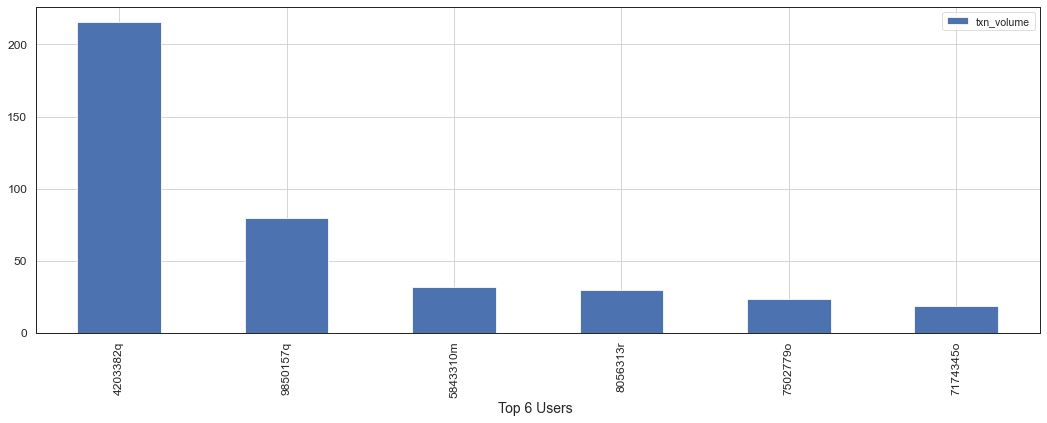

In [17]:
plot_bar_top_user()

In [18]:
def plot_top_6():  
    top_6 = data[data['status']=='successful'].groupby('acct_no').sum().sort_values('txn_volume', ascending=False)[:6].index

    users = [user for user in top_6]

    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
    fig.set_size_inches(20, 10)
    fig.subplots_adjust(wspace=0.2)
    fig.subplots_adjust(hspace=0.2)

    for user, ax in zip(users, axs.flatten()):
        status = data[data.acct_no== user]['status'].value_counts()
        status = status.sort_index(ascending=False)

        labels = status.keys()
        ax.pie(x=status, autopct="%1.1f%%", explode=[0.01]*2, labels=labels, pctdistance=0.5, startangle=90)
        ax.set_title(f'Account user - {user}',  fontsize=12)

    plt.show()

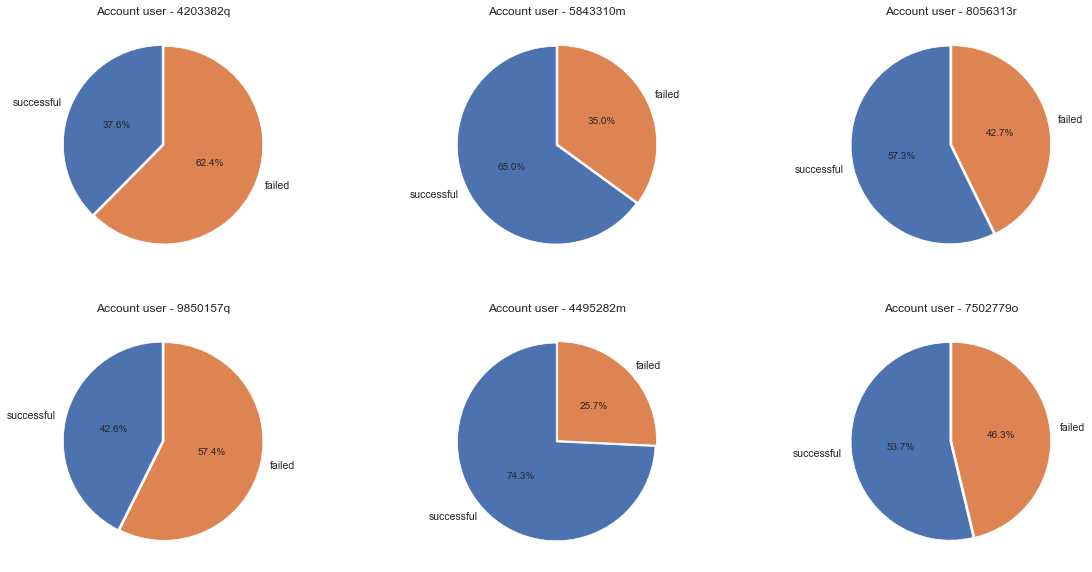

In [19]:
plot_top_6()

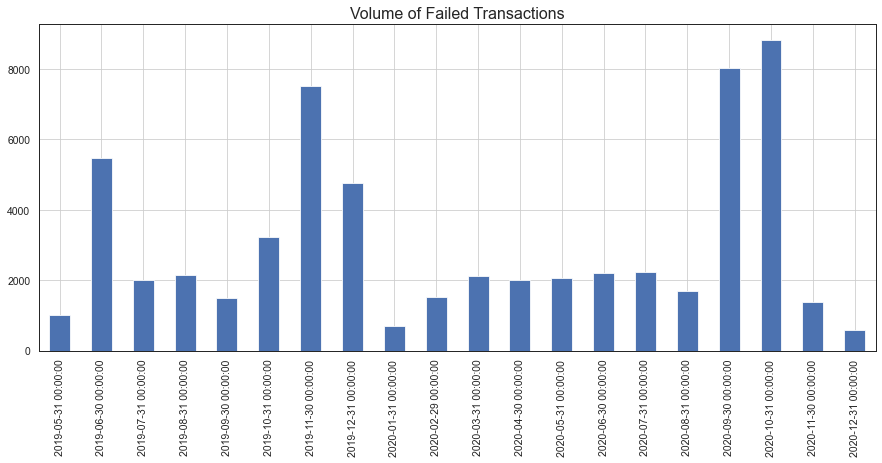

In [20]:
data[data['status']=='failed'].txn_volume.resample('M').sum().plot(kind='bar', figsize=(15,6))
plt.title('Volume of Failed Transactions', fontsize=16)
plt.grid()

#### Query into Failed transactions

A high volume of failed transactions was recorded during the "Ember" months, annually [September, October, November & December] 

In [21]:
# status
def plot_status():
    status = data.groupby('status')['acct_no'].count()
    status = status.sort_index(ascending=False)

    pie, ax = plt.subplots(figsize=[10,10])
    labels = status.keys()
    plt.pie(x=status, autopct="%0.2f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5, startangle=90)
    plt.legend(fontsize=12)
    circle = plt.Circle((0,0), 0.5, color='white')
    fig = plt.gcf()
    fig.gca().add_artist(circle)

    plt.title('Ratio of Successful transaction to Failed transaction', fontsize=14)
    plt.show()

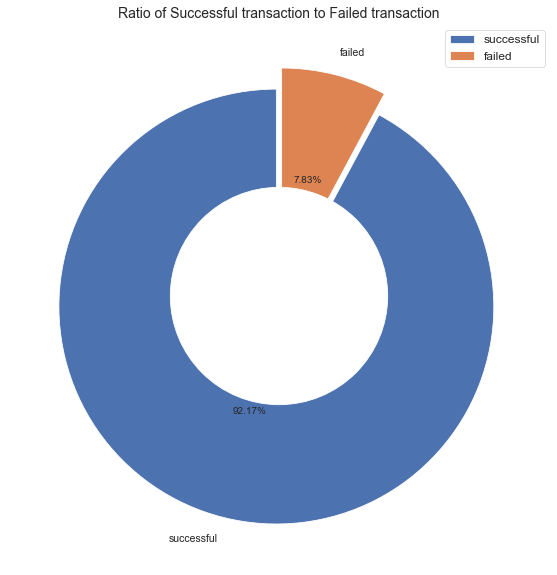

In [22]:
plot_status()

### Conclusion

In [30]:
print(f'1. There was {data["acct_no"].nunique()} unique users over the period.\n')
print(f'2. Transaction period is from ({data.index[0].strftime("%Y %B %d")}) to ({data.index[-1].strftime("%Y %B %d")}).\n')
print('3. There seem to be very high volume during October & November 2020, \n   The was the period #Endsar #EndPoliceBrutality protest was ongoing in Nigeria\n')
print('4. A high volume of failed transactions was recorded during the "Ember" months, annually [September, October, \n   November & December] ')

1. There was 8040 unique users over the period.

2. Transaction period is from (2019 May 21) to (2020 December 09).

3. There seem to be very high volume during October & November 2020, 
   The was the period #Endsar #EndPoliceBrutality protest was ongoing in Nigeria

4. A high volume of failed transactions was recorded during the "Ember" months, annually [September, October, 
   November & December] 
